# **BEYOND DYNAMIC PROGRAMMING PAPER EXPLAINED:**

This notebook presents monte carlo experiments, algorithms covered in the paper titled: "Beyond Dynamic Programming"

**THE CORE IDEA:**
The central concept of traditional reinforcement learning is to create a policy function that maps states to actions, and a stage cost function that is specific to the task at hand. An optimization problem is then formulated to determine the optimal policy and value function. However, this approach is limited to stationary policies, where the policy network is trained before the task execution, and its parameters are fixed during execution.


The central idea of bdp paper is that we can represent action sequences using real numbers and formulate an optimization problem to directly compute infinite horizon action sequence.

By utilizing this method, the BDP paper suggests that it is possible to achieve better performance in reinforcement learning problems, particularly in cases where the optimal policy is non-stationary. This approach opens up new possibilities for solving complex reinforcement learning problems that were previously difficult to address with traditional methods.

------
We call the function that maps action sequences to infinite horizon cost as the Score life function.

If the infinite horizon cost function is additive, then the Score life function obeys the following recursive equation:

---
\begin{equation}
    S(l,x) = g(x,a_i) + \gamma S(l',f(x,a_i))
\end{equation}
Where $g(x,a_i)$ is the stage cost/ instantaneous reward function, $l'$  is the life value (or the real number representing action sequence taken) from the next state  $f(x,a_i)$.

**DIFFERENT WAYS TO THINK ABOUT THE SCORE-LIFE FUNCTION:**



1.   Extension of Q learning to action sequences
2.   Number theoretic solution to optimal control problems
3.   Construction of vector space for action sequences - to simplify optimal control problems.



Perhaps the most intuitive way to think about Score-life function is to consider the following extension to the Q learning method.

The typical Q function is defined as a function of state $s$ and instantaneous action $a$. ($Q_{\pi}(s,a)$.
Now let's construct Q function for action sequences:

*   Q function with an action horizon of 2:  $Q_{\pi}(s,{a_0,a_1})$
*   Q function with an action horizon of 3:  $Q_{\pi}(s,{a_0,a_1,a_2})$
*   Q function with an action horizon of k:  $Q_{\pi}(s,{a_0,a_1,a_2,..a_{k-1}}
)$
*   Q function with an action horizon of $\infty$: $Q_{}(s,{a_0,a_1,a_2,..a_{\infty}}
)$






Now note one thing: when we extend Q function to infinite horizon action sequences, we do not technically need the policy function. The Score life function is precisely a Q function defined for infinite horizon action sequences. In this formulation, the policy function is not needed because we know an infinite sequence of actions to take, from any state.

The central idea of the Score-life programming method is to represent the action sequences using real numbers. Real numbers, technically is an infinite sequences of digits, so it is technically valid to use real numbers for representing infinite horizon action sequences.


Note that the Score-life function need not be continouos or differentiable.

**MONTE CARLO SIMULATION:**

Now let's try to compute the Score-life function for the cart-pole dynamical system using monte carlo sampling. As stage cost, we use the LQR cost $x^{T} Q x$

In [ ]:
# !git clone https://github.com/Abhinav-Muraleedharan/Beyond_Dynamic_Programming.git


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'Beyond_Dynamic_Programming'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 27 (delta 8), reused 16 (delta 4), pack-reused 0
Unpacking objects: 100% (27/27), 321.93 KiB | 3.74 MiB/s, done.


In [ ]:
# %cd Beyond_Dynamic_Programming/

/content/Beyond_Dynamic_Programming


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# env_name = "CartPole-v1"
# #env = gym.make(env_name, render_mode="human")
# env = gym.make(env_name)
# env_2 = gym.make("CartPole-v1", render_mode="human")

NameError: ignored

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
import random
import copy
from matplotlib import rc
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

In [ ]:
!pip install gymnasium
import matplotlib as mpl
import seaborn as sns
import scipy
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gym
import gym as gym_2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


MONTE CARLO SIMULATION CODE:

In [ ]:
def monte_carlo(x0,Q,N_horizon,N_episodes,gamma,terminate_episode_whn_done):
  env = gym.make("CartPole-v1")
  env.reset()
  # gamma = 0.6
  l = 0
  R = 0
  N = 2000
  n = 0
  R_array = np.empty(1)
  l_array = np.empty(1)
  while n < N_episodes:
    n = n + 1
  # initialize state:
    env.reset()
    # initial_state = np.array([[ 0.0, 0.0, 0, 0.0]])
    initial_state_env = x0
    initial_state = np.array([x0])

    env.state = env.unwrapped.state = initial_state_env
    # print(env.state)
  # env.state = initial_state
    l = 0 #initialize life value
    R = 0 # initialize cumulative reward
  # R = np.dot(initial_state,initial_state)
    # print(initial_state)
    R = (initial_state@Q@initial_state.T)[0][0]
  # R = 0
    for i in range(N_horizon):
    # action = env.action_space.sample()
    # state = env.state
    # index = state_index(state)
    # print(env.state)
      action = env.action_space.sample()
      l = l + (2**(-i-1))*action
    # print("step i",i,"action=",action)
      obs, reward, done, truncated, info= env.step(action)
      reward = obs@Q@obs
      # reward = (obs@Q@obs.T)
    # print("Observation", obs)
    # print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
    # screen = env.render(mode='rgb_array')
      R = (gamma**(i+1))*reward + R
    # plt.imshow(screen)
    # ipythondisplay.clear_output(wait=True)
    # ipythondisplay.display(plt.gcf())
      if terminate_episode_whn_done:
        if done:
          break
    # print(Q[index[0]][index[1]][index[2]][index[3]][0])
    R_array = np.append(R_array ,R)
    l_array = np.append(l_array ,l)
  # ipythondisplay.clear_output(wait=True)

    # print("Iterations that were run:",i)
    # print("Reward in episode:",R)
    # print("Life Value:",l)
  env.close()
  plt.scatter(l_array, R_array,s=0.1)
# plt.plot(myline,(mymodel(myline)))
# plt.ylim((0.1,3))
  plt.xlabel('life (l)')
  plt.ylabel('Score S(l)')
  plt.show()
  return l_array, R_array

In [ ]:
#initialize parameters (You may play around with these parameters to see how the fractal changes with different parameter values)
q = [1,1,1,1]
Q = np.diag(q)
gamma = 0.5
N_horizon = 100
N_episodes = 2000

In [ ]:
initial_state = [0,0,0,0]

We conduct monte carlo simulations:

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


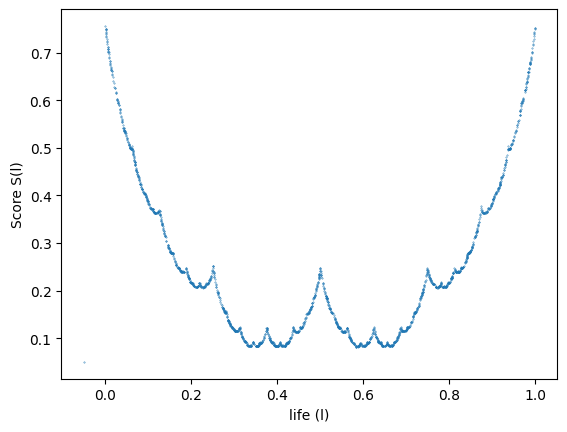

In [ ]:
l_array_0, R_array_0 = monte_carlo(initial_state,Q,N_horizon,N_episodes,gamma,terminate_episode_whn_done = False)

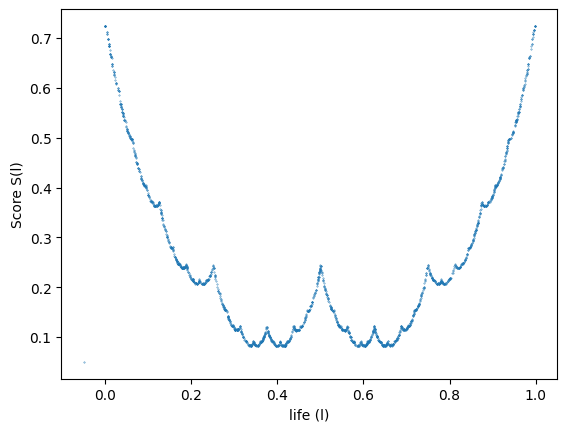

In [ ]:
l_array_0, R_array_0 = monte_carlo(initial_state,Q,N_horizon,N_episodes,gamma,terminate_episode_whn_done = True)

That's a beautiful fractal curve. It's an inverted takagi landsberg fractal. Recall that the minima of this function, $l^*$ represents the optimal infinite horizon action sequence taken from the state x. Since we are at the origin state, the optimal action sequence in this case is to simply oscillate around the initial state (action inputs are +/- 10 N.)

The minima of the takagi landsberg function is at 1/3 or 2/3 (see bdp paper for references).

 Now 1/3 corresponds to the action sequence: {0,1,0,1,0,....}

 And 2/3 corresponds to the action sequence: {1,0,1,0,1,....}

This validates our intuition- the minima of the Score life function maps precisely to the optimal infinite horizon action sequence.

Now let's compute Score-life function of a different state, of the same dynamical system, same stage cost function. We apply action 0, reach another neighbouring state, and run monte carlo simulations to compute Score-life function

In [ ]:
env2 = gym.make("CartPole-v1")
env2.reset()
env2.state = env2.unwrapped.state = initial_state
action = 0
nxt_state_0, reward, done, truncated, info = env2.step(action)

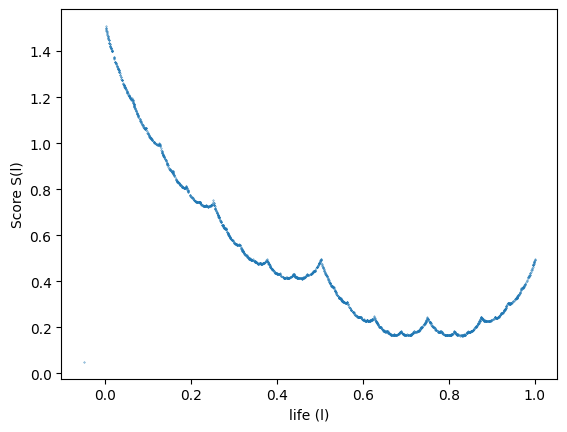

In [ ]:
l_array_1, R_array_1 = monte_carlo(nxt_state_0,Q,N_horizon,N_episodes,gamma,terminate_episode_whn_done = False)

Note one thing: this fractal function is very similar to the fractal function which we previously computed. It is precisely a coordinate transformation applied to the Score-life function of origin state.

All Score life functions of a given dynamical system, are related by coordinate transfornations!!!

This is true, because the Score life function of cartpole dynamical system follows this recursive equation: (Theorem 1)

\begin{equation}
    S(l,\mathbb{X}) = g(\mathbb{X},K^{-1}(\lfloor2l\rfloor)) + \gamma S(\{2l\},f(\mathbb{X},K^{-1}(\lfloor2l\rfloor)))
\end{equation}

We can apply the same recursion equation to the state $f(x,a_i)$, the next state $f(f(x,a_i),a_k)$, and so on...

We exploit this relation between score-life functions of different states to compute optimal action sequence from a given state $x$.

The methods can be roughly classified into two:


1.   Approximate Methods
2.   Exact Methods

In approximate methods, we represent approximate Score life function using polynomials, and then compute approximate values of infinite horizon cost from neighbouring states. Then, we choose actions that land us in the state with minimal cost-to go. See section 4 of the paper for a detailed description of approximate methods.

In exact methods, we compute the exact Score-life function of a state $x$ and optimize the score-life function. A pair of dynamical system and stage cost function lead to a family of fractal functions, and in exact methods we need to compute closed form equations that represent the fractal. We represent fractal functions in Faber Schauder basis. Note that however, fractals are non- differentiable everywhere, hence gradient descent methods converge poorly for large family of fractal functions. Efficient optimization of Fractal functions is an open research problem.



**APPROXIMATE SCORE-LIFE PROGRAMMING:**

This section contains methods that use polynomial/quadratic approximations of the Score-life function for computing optimal action.

In [ ]:
#import all dependencies for openai gym
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
import random
import copy

import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
# display = Display(visible=0, size=(400, 300))
# display.start()
import scipy
from scipy.linalg import block_diag

In [ ]:
global gamma, Q
q = [2,1,8,1]
Q = np.diag(q)
gamma = 0.5
J_val = 0
J_array = []

In [ ]:
###### helper functions:

### define a quadratic Score-life function
def quadratic_S(l, a, b, c):
    return a *( l**2) + b * l + c
#### define function to optimize quadratic Score-life function
def optimize_quadratic(coefficients):
    a = coefficients[0]
    b = coefficients[1]
    c = coefficients[2]
    ###evaluate at 0
    S_0 = quadratic_S(0,a,b,c)
    ###evaluate at 1
    S_1 = quadratic_S(1,a,b,c)
    ###find minima,
    l_optima = -b/(2*a)
    if 0 <= l_optima <= 1:
        S_optima = quadratic_S(l_optima,a,b,c)
    else:
        S_optima = 1e16
    cost_to_go = min(S_0,S_1,S_optima)
    return cost_to_go

#### function to convert fraction to binary representation
def fraction_to_binary(fraction, num_bits, M):
    if fraction == 0:
        return '.' + '0' * (num_bits - 1)
    elif fraction == 1:
        return  '.' + '1' * num_bits
    else:
        binary = ''
        # Check if the fraction is less than 1
        if fraction < 1:
            binary += '.'
        for i in range(num_bits):
            fraction *= M
            if fraction >= 1:
                binary += '1'
                fraction -= 1
            else:
                binary += '0'
        return binary

#### Function to estimate Score-life function at specific l-values
def S(l,X,gamma,N,env):
#    env = gym.make("CartPole-v0")
    env.reset()
    M = env.action_space.n
    R = 0
    action_sequence = fraction_to_binary(l,N,M)
#    print(action_sequence)
    env.state = env.unwrapped.state = X
    for i in range(len(action_sequence)-1):
        action = int(action_sequence[i+1])
        state, reward, terminated, truncated, info  = env.step(action)
#        reward = custom_reward(state,action)
        reward = -reward
        R = (gamma**(i))*reward + R
        if terminated == True:
#            R = R +(gamma**(i))*100
            break
    env.close()
    env.reset()
    return R

def evaluate_quadratic_score_life_function(state,n,N_horizon,gamma,env):
    l = np.random.uniform(0, 1, n)
    S_approx = []
    for el in l:
        S_val = S(el,state,gamma,N_horizon,env)
        S_approx.append(S_val)
    S_approx = np.array(S_approx)
    popt, pcov = curve_fit(quadratic_S,l,S_approx)
    a_opt, b_opt, c_opt = popt
    return a_opt,b_opt,c_opt

def plot_quadratic(a_opt,b_opt,c_opt):
    l = np.linspace(0, 1, 100)
    S_approx = quadratic_S(l,a_opt,b_opt,c_opt)
    plt.plot(l,S_approx,color = 'red',label ='Approximate Score-life function')
    plt.xlabel('l')
    plt.ylabel('Approximate Score-life-function')
    return plt

def compute_cost_to_go(state,n,N,gamma,env):
    a_opt,b_opt,c_opt = evaluate_quadratic_score_life_function(state,n,N,gamma,env)
    coefficients_quad = [a_opt,b_opt,c_opt]
    J = optimize_quadratic(coefficients_quad)
    return J


def compute_Q(state,env,n,N,gamma):
    Q = []
    for a in range(env.action_space.n):
        env.state = env.unwrapped.state = state
        next_state, reward, terminated, truncated, info = env.step(a)
#        reward = custom_reward(observation,action)
        J = compute_cost_to_go(next_state,n,N,gamma,env)
#        reward = custom_reward(next_state,a)
        reward = -reward
        J =  reward + gamma*J
        Q.append(J)
    env.reset()
    return Q


In [ ]:
env = gym.make("CartPole-v1")
env_2 = gym_2.make("CartPole-v1")
gamma = 0.8
N = 200
j_max = 10
observation= env_2.reset()
k = 0
#N_action_horizon = 10
n = 200
### simulation::::
x_array =[]
x_dot_array = []
theta_array = []
theta_dot_array = []

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
!apt-get update
!apt-get install -y xvfb
!pip install pyvirtualdisplay
!pip install xvfbwrapper

# import gym
from pyvirtualdisplay import Display
from xvfbwrapper import Xvfb
import matplotlib.pyplot as plt

# Start virtual display
display = Display(visible=0, size=(1400, 900))
display.start()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 222 kB in 3s (69.2 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubunt

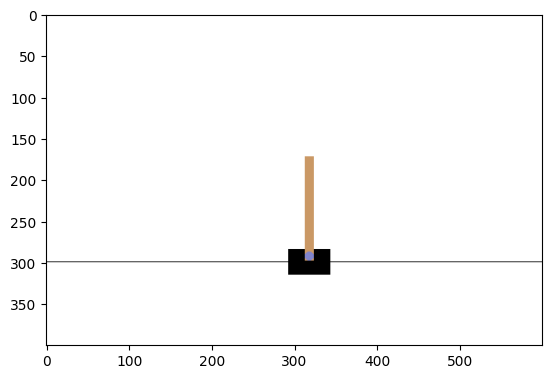

time steps: 97
[-4.9791731457788, -4.93912519907715]
action:
0
[ 0.1491743  -0.18291105 -0.00974834  0.03525549]


In [ ]:
J_val = 0
J_array = []
# xvfb = Xvfb(width=1280, height=740)
# xvfb.start()
prev_screen = env_2.render(mode='rgb_array')
plt.imshow(prev_screen)
for i in range(1000):
    #compute faber schauder coefficients:
#    action = env.action_space.sample()
    print("time steps:",i)
    env.reset()
    Q = compute_Q(observation,env,n,N,gamma)
    print(Q)
    action = Q.index(min(Q))
    print("action:")
    print(action)
    observation, reward, terminated, info = env_2.step(action)
    J_val = J_val + (gamma**i)*reward
    J_array.append(J_val)
    print(observation)
    x_array.append(observation[0])
    x_dot_array.append(observation[1])
    theta_array.append(observation[2])
    theta_dot_array.append(observation[3])
    screen = env_2.render(mode = 'rgb_array')
    # # Convert screen to numpy array
    # screen_array = np.array(screen)
    # # Convert to float32 data type
    # screen_array = screen_array.astype(np.float32)
    plt.imshow(screen)
    ipythondisplay.clear_output(wait = True)
    ipythondisplay.display(plt.gcf())
    # env_2.render()
    if terminated or truncated:
        print("terminating...Iterations:",i)
        break
        observation, info = env.reset()
fig, ax = plt.subplots()
ax.plot(x_array, label=f'Trajectory - x')
ax.plot(x_dot_array, label=f'Trajectory  - x_dot')
ax.plot(theta_array, label=f'Trajectory - theta')
ax.plot(theta_dot_array, label=f'Trajectory  - theta_dot')
ax.set_title('Simulation Trajectories')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
# Show legend
ax.legend()
# Display the plot
plt.savefig(f'Simulation_results_approx_traj_plot.jpg', dpi=300)
plt.show()
fig, ax = plt.subplots()
ax.plot(J_array, label=f'Cumulative Reward',color = 'red')
#ax.plot(x_dot_array, label=f'Trajectory  - x_dot')
#ax.plot(theta_array, label=f'Trajectory - theta')
#ax.plot(theta_dot_array, label=f'Trajectory  - theta_dot')
ax.set_title('Cumulative Reward vs timesteps')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Cumulative Reward')
# Show legend
ax.legend()
# Display the plot
plt.savefig(f'Simulation_results_approx_reward_plot.jpg', dpi=300)
plt.show()
env.close()
env_2.close()

The approximate method does not achieve global stability, but still performs reasonably well when compared to classical value iteration methods which involve discretizing the state space.

Now let's focus our attention onto the beast: Exact methods!

Exact methods are tricky cause we have to compute the fractal equation and minimize it. Fractals, by definition are non-differentiable everywhere, hence we would have to use techniques from fractal literature/number theory to compute the minima of fractal equation.


For the cart pole dynamical system, with LQR stage cost, the equation of the Score-life function is given by

\begin{equation}
   S(l,x) = \alpha(x) + \beta(x) \Sigma_{i=0}^{\infty} \frac{s(2^i (\frac{l + q}{2^p}))}{2^i}
\end{equation}

where $s()$ is the triangle wave function.

At origin state, the parameters $\alpha(x)$, $\beta(x),p,q$ are:

\begin{equation}
\alpha(x) = 0.75
\end{equation}
\begin{equation}
\beta(x) = -1
\end{equation}
\begin{equation}
p = 0
\end{equation}
\begin{equation}
q = 0
\end{equation}

Let's plot the fractal!

In [ ]:
import numpy as np


def s(x):
    """ Returns the distance to the closest integer
    >>> ε = 2 ** (-20)
    >>> abs(s(3.5) - 0.5) < ε
    True
    >>> abs(s(1) - 0.0) < ε
    True
    >>> abs(s(-2.23) - 0.23) < ε
    True
    >>> abs(s(-9.88) - 0.12) < ε
    True
    >>> import numpy as np
    >>> s(np.arange(1, 3, 0.5))
    array([0. , 0.5, 0. , 0.5])
    """
    # x = 0.5*x
    d = x - np.floor(x)
    return np.minimum(d,1-d)


def fn(N):
    """ Returns the Takagi function (N is an approximation parameter)
    >>> ε = 2 ** (-20)
    >>> f = fn(100)
    >>> f(0)
    0.0
    >>> f(1)
    0.0
    >>> f(0.5)
    0.5
    >>> abs(f(0.2) - f(0.8)) < ε
    True
    >>> abs(2 * f(0.1) - f(0.2) - 0.2) < ε
    True
    >>> abs(2 * f(0.3) - f(0.6) - 0.6) < ε
    True
    """
    def f(x):
        return sum(s((1.0*x) *(2) ** n ) * (0.5 ** n) for n in range(N))
    return f

In [ ]:
def plot_fractal(l_array,R_array):
  x = l_array
  y = R_array
  # fig = plt.figure(figsize=(4, 2), dpi=100)
  # gs = fig.add_gridspec(1, 2)
  fig = plt.figure()
  kernel = gaussian_kde(np.vstack([x, y]))
  c = kernel(np.vstack([x, y]))
  # %matplotlib inline
  plt.scatter(x, y, s=1, c=c, cmap=mpl.cm.viridis, edgecolor='none')
  plt.xlabel('life (l)')
  plt.ylabel('Score S(l)')
  # ax = fig.add_subplot(gs[0, 1])
  # ax.scatter(x, y, s=1, c=c, cmap=mpl.cm.viridis, rasterized=True, edgecolor='none')
  # ax.set_title('Rasterized')
  plt.xticks([0,1])
  # plt.yticks([0,1,2])
  plt.savefig('image.png', format='png', dpi=1200)
  x = np.linspace(0, 1, 1000)

  # y_1 = -0.5 + 2*fn(10)(x)
  # plt.plot(x, y_1)
  y_0_1 = 0.5 - 1*fn(10)(x)
  y_0_1 = (0.75 - 0)/gamma - (1/gamma)*fn(15)(x*0.5)
  plt.plot(x, y_0_1)
  # y_0_2 = 0.70 - 1*fn(10)(x)
  # plt.plot(x, y_0_2)

  # y_2 = 1.5 - 2*fn(10)(x)
  # plt.plot(x, y_2)

  plt.show()
  return plt


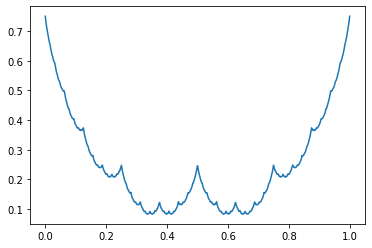

In [ ]:
x = np.linspace(0, 1, 1000)

y = 0.75 - 1*fn(15)(x)
plt.plot(x, y)
plt.show()

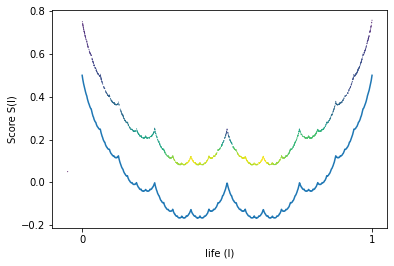

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plot_fractal(l_array_0,R_array_0) #note that our fractal equation fits exactly with the monte carlo datapoints.

Adding some offset to the fractal equation to show to seperate curves:

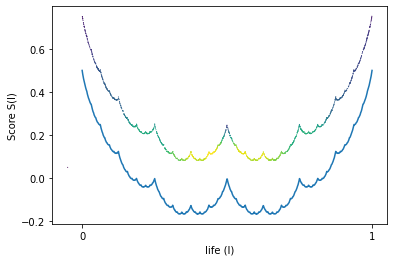

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plot_fractal(l_array_0,R_array_0)

In the above case, $\alpha(x)$ was updated from 0.75 to 0.5. (Note the difference between the fractal function and the monte carlo datapoints.) This is just for illustrative purposes, just wanted to show that the previous plot contains two different graphs (monte carlo data points and fractal function curve), exactly overlapping each other.

Now coming back to the Score life function from origin state;
\begin{equation}
   S(l,x) = 0.75 - \Sigma_{i=0}^{\infty} \frac{s(2^i l)}{2^i}
\end{equation}

Here, the function: $\Sigma_{i=0}^{\infty} \frac{s(2^i l)}{2^i}$ is called the takagi landsberg function. The global minima of this function occurs at 1/3 and 2/3.

The optimum cost-to-go, of the optimal trajectory is given by:

\begin{equation}
  J^*(x) = Min_{l}(S(l,x) )
\end{equation}
\begin{equation}
 J^*(x)  =  Min_{l}(0.75 - \Sigma_{i=0}^{\infty} \frac{s(2^i l)}{2^i}))
\end{equation}

\begin{equation}
 J^*(x)  =  3/4-2/3 = 1/12
\end{equation}

That's a precise estimate for the optimal cost to go! Note that we didn't have to compute an integral in this case, but we exploited properties of fractal functions to compute optimal cost-to-go in closed form!

That's it -no approximations, no lower bounds or upper bounds -- exact solution!

From the monte carlo plots, one can verify that the optimal value is close to 0.1. (Exact value is 1/12)

Ok, but that's optimal cost to go from the origin state. But how about other states? Let's think about that case:

Consider the neighbouring states:

x_0 = f(x,u=0)

In [ ]:
env2 = gym.make("CartPole-v0")
env2.reset()
env2.state = env2.unwrapped.state = initial_state
action = 0
nxt_state_0, reward, done, info = env2.step(action)

/usr/local/lib/python3.8/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
g = stage_cost(nxt_state_0,0, Q)

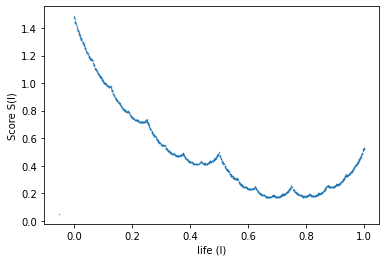

In [ ]:
l_array_1, R_array_1 = monte_carlo(nxt_state_0,Q,N_horizon,N_episodes,gamma,terminate_episode_whn_done = False)

%plot fractal as per equation:

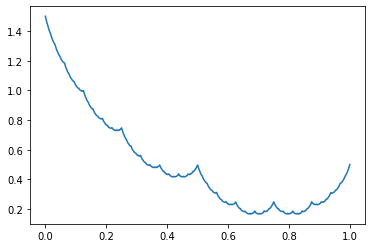

In [ ]:
x = np.linspace(0, 1, 1000)

y = (0.75 - 0)/gamma - (1/gamma)*fn(15)(x*0.5)
plt.plot(x, y)
plt.show()

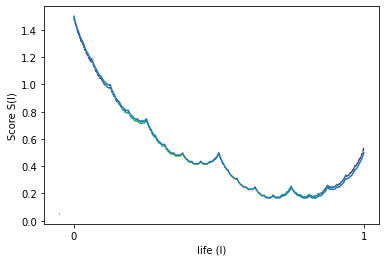

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plot_fractal(l_array_1,R_array_1)

Computation of Faber Schauder coefficients:
The score life function, when continous is a fractal function, and fractals can be represented in faber schauder basis. For a given Score-life function, to compute corresponding faber schauder coefficients, we need to perform the following computations:

Thescore-life function in the faber schauder basis as:

\begin{equation}
    S(l,x) = \alpha_{0}(x) + \alpha_{1}(x) l + \Sigma_{j = 0}^{\infty} \Sigma_{i=0}^{2^j - 1} \beta_{i,j}(x)e_{i,j}(l)
\end{equation}

Where, $e_{i,j}(l)$ are the faber schauder basis functions given by:
\begin{equation}
    e_{i,j}(l) = 2^j(|l - \frac{i}{2^j}| + |l -\frac{i+1}{2^j}| - |2l - \frac{2i + 1}{2^{j+1}}|)
\end{equation}
The coefficients of the Faber Schauder expansion are given by:
\begin{equation}
    \alpha_0(x) = S(l=0,x)
\end{equation}
\begin{equation}
    \alpha_0(x) = S(l=0,x)
\end{equation}
\begin{equation}
    \alpha_1(x) = S(l=1,x) - S(l=0,x)
\end{equation}
\begin{equation}
    \beta_{i,j}(x) = S(l=\frac{2i + 1}{2^{j+1}},x) - \frac{1}{2}(S(l=\frac{i}{2^j},x)+ S(l = \frac{i+1}{2^j},x))
\end{equation}

In [ ]:
def S(l,X, gamma,Q,approximation_index):
  env = gym.make("CartPole-v0")
  env.reset()
  R = (X@Q@X.T)
  action_sequence = fraction_to_binary(l,num_bits = approximation_index)
  print(action_sequence)
  env.state = env.unwrapped.state = X
  for i in range(len(action_sequence)-1):
    u_i = int(action_sequence[i+1])
    obs, reward, done, info = env.step(u_i)
    reward = obs@Q@obs
    R = (gamma**(i+1))*reward + R
  env.close()
  return R


In [ ]:
X@Q@X.T

0

In [ ]:
l = 0
X =np.array([0,0,0,0])
approximation_index = 1500
gamma = 0.5
val = S(l,X, gamma,Q,approximation_index)
print(val)

.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
def compute_beta_ij(i,j,X,gamma,Q,approximation_index):
  l_1 = (2*i + 1)/(2**(j+1))
  l_2 = i/(2**j)
  l_3 = (i+1)/(2**j)
  beta_ij = S(l_1,X, gamma,Q,approximation_index) - 0.5*(S(l_2,X, gamma,Q,approximation_index)+ S(l_3,X, gamma,Q,approximation_index))
  return beta_ij

In [ ]:
i = 0
j = 2
# approximation_index = 1000
print(compute_beta_ij(i,j,X,gamma,Q,approximation_index))

.001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
def fraction_to_binary(fraction, num_bits=200):
    if fraction == 0:
        return '.' + '0' * (num_bits - 1)
    elif fraction == 1:
        return  '.' + '1' * num_bits
    else:
        binary = ''
        # Check if the fraction is less than 1
        if fraction < 1:
            binary += '.'
        for i in range(num_bits):
            fraction *= 2
            if fraction >= 1:
                binary += '1'
                fraction -= 1
            else:
                binary += '0'
        return binary


In [ ]:
binary = fraction_to_binary(0.99999999, num_bits=2000)
print(binary)


.111111111111111111111111110101010000110011100010001110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
len(binary)

2001

In [ ]:
int(binary[5])

0